In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 16})


In [3]:
dataframe = pd.read_csv('D:/Programming/Python/Projects/HW_Week_6/iris.csv')
df = dataframe[['sepal.length', 'petal.length','variety']] 
dataframe.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.head()

,sepal.length,petal.length,variety
0,5.1,1.4,Setosa
1,4.9,1.4,Setosa
2,4.7,1.3,Setosa
3,4.6,1.5,Setosa
4,5.0,1.4,Setosa


In [5]:
data = df.to_numpy()
X = data[:100,:2]
y = data[:100,2:]


In [6]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
a = y_test.shape
y_test = y_test.reshape(a[0],)
a = y_train.shape
y_train = y_train.reshape(a[0],)

In [8]:
######
# Plot performance

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(18, 4))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Number of input data")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Number of input data")
    axes[1].set_ylabel("Training times (minutes)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("Training times (minutes)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [9]:
#######
#Plot trainning results

from sklearn.metrics import ConfusionMatrixDisplay
x_min, x_max = 0, X[:, 0].max() + 1
y_min, y_max = 0 , X[:, 1].max() + 1

def plot_properties(estimator, X_test, y_test):

    #plot confustion matrices
    ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    plt.show()

    #Plot distribution

    # define the x and y scale
    x1grid = np.arange(x_min, x_max, 0.01)
    x2grid = np.arange(y_min, y_max, 0.01)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    yhat = 1-estimator.predict_proba(grid)
    # keep just the probabilities for class 0
    yhat = yhat[:, 0]
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # Plot main

    # plot the grid of x, y and z values as a surface
    c = plt.contourf(xx, yy, zz, cmap='viridis_r')
    # add a legend, called a color bar
    plt.colorbar(c)
    # create scatter plot for samples from each class


    plt.scatter(X_test[y_test=='Setosa',0],X_test[y_test=='Setosa',1], marker='.',c='orange', label = 'Setosa')
    plt.scatter(X_test[y_test!='Setosa',0],X_test[y_test!='Setosa',1], marker='.',c='blue', label = 'Versicolor')
    plt.ylabel('sepal.length')
    plt.xlabel('petal.length')
    plt.legend()

    plt.show()


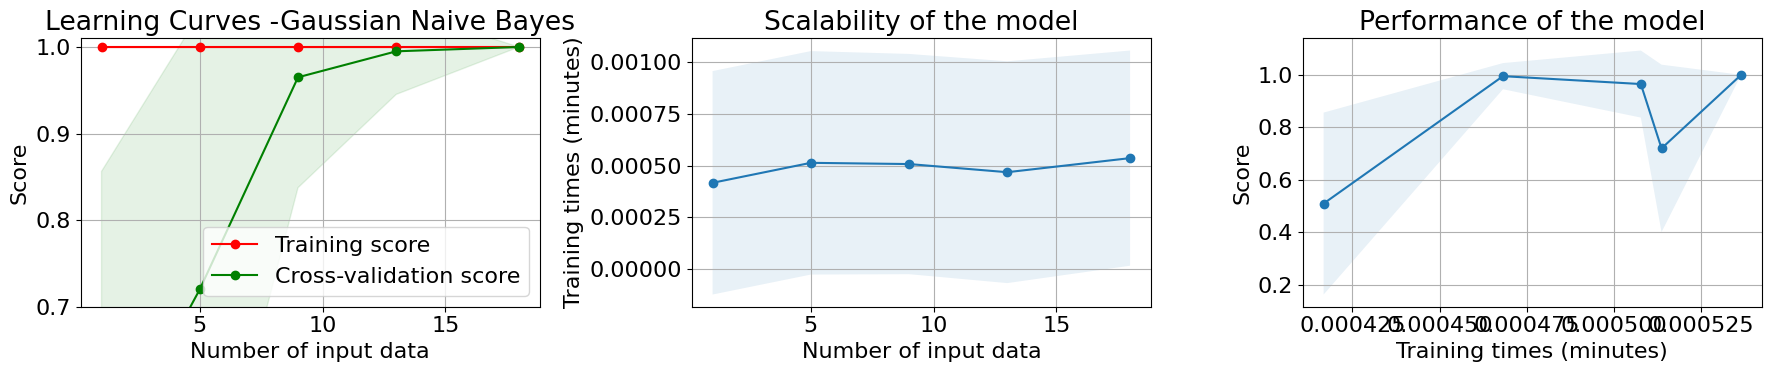

In [10]:
#Train
from sklearn import naive_bayes
gaussian_clf = naive_bayes.GaussianNB()
gaussian_clf.fit(X_train,y_train)


# Plot
title = "Learning Curves -Gaussian Naive Bayes"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
estimator = gaussian_clf
plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.tight_layout()
plt.show()

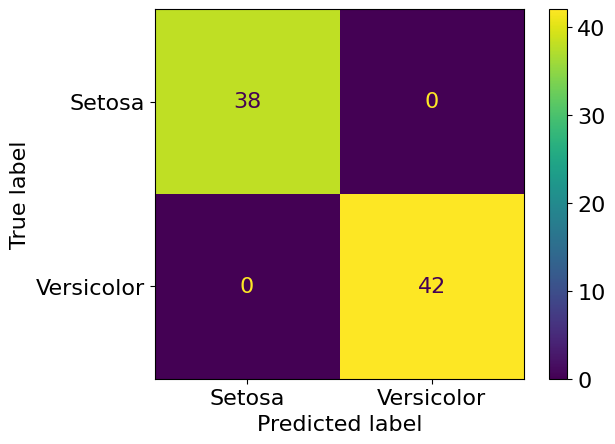

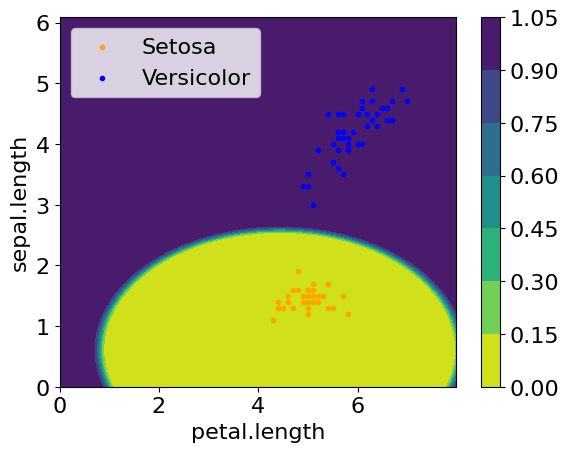

In [11]:
plot_properties(gaussian_clf,X_test,y_test)

In [12]:
# Multilayer Perceptron
#Train
from sklearn.neural_network import MLPClassifier
mlp_clf=MLPClassifier( activation='logistic', hidden_layer_sizes=(100,20), batch_size=200, solver='adam')
mlp_clf.fit(X_train, y_train)
score = mlp_clf.score(X_test,y_test)


d:\Programming\Python\Install\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
d:\Programming\Python\Install\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


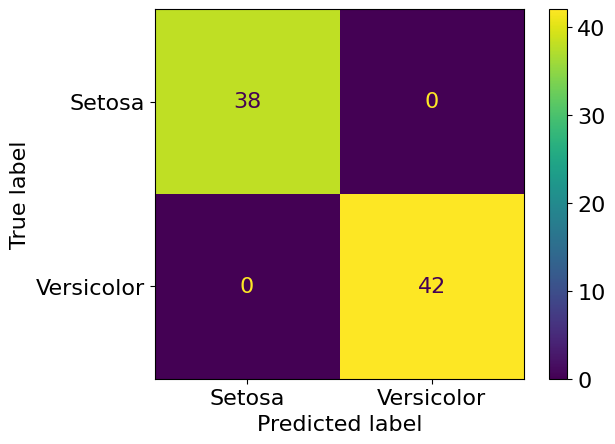

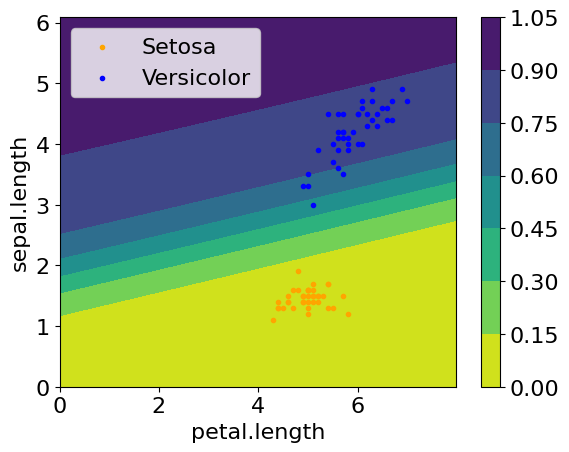

In [13]:
#Plot
plot_properties(mlp_clf, X_test, y_test)

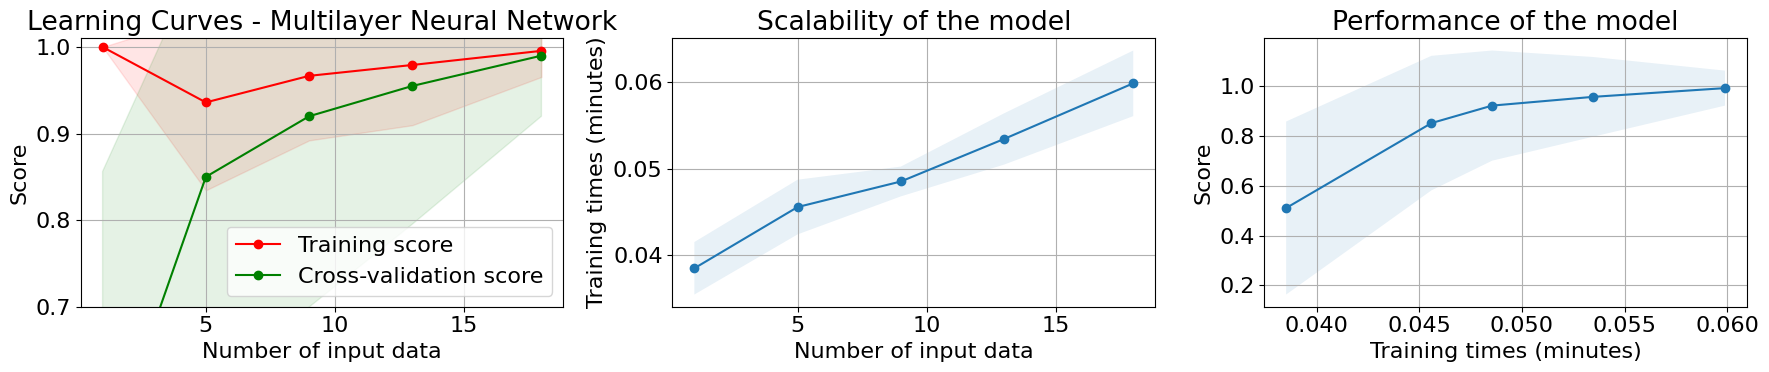

In [14]:
title = "Learning Curves - Multilayer Neural Network"
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
estimator = mlp_clf
plot_learning_curve(
    estimator, title, X_train, y_train, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.tight_layout()
plt.show()

In [15]:
from sklearn import svm
from sklearn.svm import  SVC
svm_clf = SVC(kernel="linear", C=1,probability=True, random_state=0)
svm_clf.fit(X_train, y_train)
score = svm_clf.score(X_test,y_test)


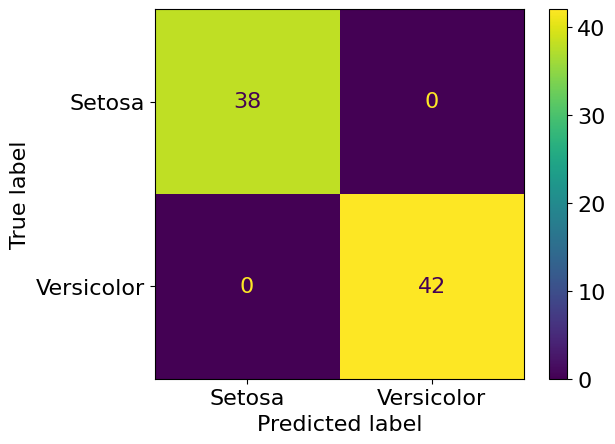

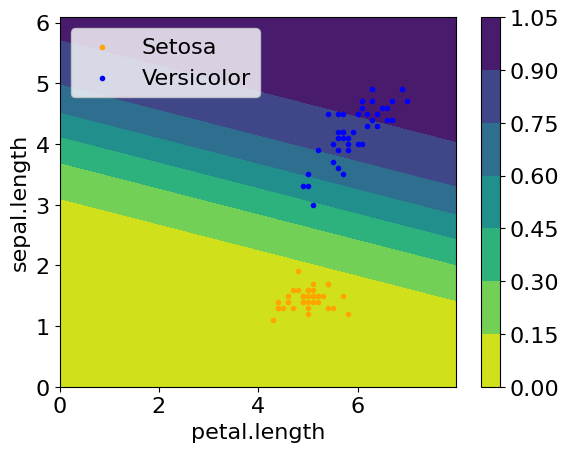

In [16]:

plot_properties(svm_clf, X_test, y_test)

In [17]:
from sklearn.metrics import classification_report
def plot_report(estimator, X, y):
    y_pred = estimator.predict(X)
    a = classification_report(y, y_pred, digits=5)
    print(estimator.__class__.__name__)
    print(a)


In [18]:
for es in [mlp_clf, svm_clf, gaussian_clf]:
    plot_report(es, X_train, y_train)

MLPClassifier
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        12
  Versicolor    1.00000   1.00000   1.00000         8

    accuracy                        1.00000        20
   macro avg    1.00000   1.00000   1.00000        20
weighted avg    1.00000   1.00000   1.00000        20

SVC
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        12
  Versicolor    1.00000   1.00000   1.00000         8

    accuracy                        1.00000        20
   macro avg    1.00000   1.00000   1.00000        20
weighted avg    1.00000   1.00000   1.00000        20

GaussianNB
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        12
  Versicolor    1.00000   1.00000   1.00000         8

    accuracy                        1.00000        20
   macro avg    1.00000   1.00000   1.00000        20
weighted avg    1.00000   1.00000   1.00000  

In [19]:
for es in [mlp_clf, svm_clf, gaussian_clf]:
    plot_report(es, X_test, y_test)

MLPClassifier
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        38
  Versicolor    1.00000   1.00000   1.00000        42

    accuracy                        1.00000        80
   macro avg    1.00000   1.00000   1.00000        80
weighted avg    1.00000   1.00000   1.00000        80

SVC
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        38
  Versicolor    1.00000   1.00000   1.00000        42

    accuracy                        1.00000        80
   macro avg    1.00000   1.00000   1.00000        80
weighted avg    1.00000   1.00000   1.00000        80

GaussianNB
              precision    recall  f1-score   support

      Setosa    1.00000   1.00000   1.00000        38
  Versicolor    1.00000   1.00000   1.00000        42

    accuracy                        1.00000        80
   macro avg    1.00000   1.00000   1.00000        80
weighted avg    1.00000   1.00000   1.00000  